### Task 4a. Analytically Computing Partial Gradients

In order to find $\arg\min_{x_i} f({\mathbf{x}_{t_0}}) \forall i \in {1,2,3}$ of our function
$$ f(\mathbf{x}) = \exp(x_1 - 3x_2 + 3) + \exp(3x_2 - 2x_3 - 2) + \exp(2x_3 - x_1 + 2) $$
on each t-th iteration we need to find a partial derivative by each variable, set it to zero and find the value of $x_i$ in terms of fixed rest variables; and for each other variable we use already calculated previously value of variable. \
For example, on the t-th iterattion we do:
$$ \begin{cases}
   \frac{\partial f}{\partial x_1} = 0 \ \textcolor{orange}\rightarrow \ 
   \exp{\left(x_1 - 3x_2 + 3\right)} - \exp{\left(2x_3 - x_1 + 2\right)} = 0 \ \textcolor{orange}\rightarrow \
   x_1 = x_3 + \frac{3}{2}x_2 - \frac{1}{2} = \xi_t \ \textcolor{orange}\rightarrow \ \arg\min_{x_1} f({\mathbf{x}_{t}}) = f\left(\xi_t, x_{2_0}, x_{3_0}\right)
   \\
   \frac{\partial f}{\partial x_2} = 0 \ \textcolor{orange}\rightarrow \  
   \exp{\left(x_1 - 3x_2 + 3\right)} - \exp{\left(3x_3 - 2x_3 - 2\right)} = 0 \ \textcolor{orange}\rightarrow \
   x_2 = \frac{1}{6}\xi_t + \frac{1}{6}x_3 + \frac{5}{6} = \zeta_t \ \textcolor{orange}\rightarrow \ 
   \arg\min_{x_2} f({\mathbf{x}_{t}}) = f\left(\xi_t, \zeta_t, x_{3_0}\right)
   \\
   \frac{\partial f}{\partial x_3} = 0 \ \textcolor{orange}\rightarrow \  
   \exp{\left(3x_2 - 2x_3 - 2\right)} - \exp{\left(2x_3 - x_1 + 2\right)} = 0 \ \textcolor{orange}\rightarrow \
   x_3 = \frac{1}{4}\xi_t + \frac{3}{4}\zeta_t - 1 = \theta_t \ \textcolor{orange}\rightarrow \ 
   \arg\min_{x_3} f({\mathbf{x}_{t}}) = f\left(\xi_t, \zeta_t, \theta_t\right)
   \end{cases}
$$

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def argmin_x1(point):
    '''
    Returns a partial derivative by x_1 of the given function.
    :param point: a tuple with a point coordinates.
    :return: a value of a partial derivative by x_1.
    '''
    x_1, x_2, x_3 = point
    return x_3 + (3 / 2) * x_2 - 0.5


def argmin_x2(point):
    '''
    Returns a partial derivative by x_2 of the given function.
    :param point: a tuple with a point coordinates.
    :return: a value of a partial derivative by x_2.
    '''
    x_1, x_2, x_3 = point
    return (1 / 6) * x_1 + (1 / 3) * x_3 + (5 / 6)


def argmin_x3(point):
    '''
    Returns a partial derivative by x_3 of the given function.
    :param point: a tuple with a point coordinates.
    :return: a value of a partial derivative by x_3.
    '''
    x_1, x_2, x_3 = point
    return (1 / 4) * x_1 + (3 / 4) * x_2 - 1

init_point_a = (4,3,2)
minimum_x1 = argmin_x1(init_point_a)
minimum_x2 = argmin_x2(init_point_a)
minimum_x3 = argmin_x3(init_point_a)

print(f'argmin_x1 = {round(minimum_x1, 2)}, argmin_x2 = {round(minimum_x2, 2)}, argmin_x3 = {round(minimum_x3, 2)}')

argmin_x1 = 6.0, argmin_x2 = 2.17, argmin_x3 = 2.25


In [11]:
def f(point):
    '''
    Return a value of a function in the given point.
    :param point: a tuple with the given point coordinates.
    :return: a function value in the point.
    '''
    x_1, x_2, x_3 = point
    return np.exp(x_1 - 3 * x_2 + 3) + np.exp(3 * x_2 - 2 * x_3 - 2) + np.exp(2 * x_3 - x_1 + 2)


def coordinate_descent(f,argmin,x_t0,max_iter=25):
    '''
    
    '''
    argmin_x1, argmin_x2, argmin_x3 = argmin
    x1, x2, x3 = x_t0
    for t in range(1, max_iter + 1):
        x1 = argmin_x1((x1,x2,x3))
        x2 = argmin_x2((x1,x2,x3))
        x3 = argmin_x3((x1,x2,x3))

    return (x1,x2,x3), f((x1,x2,x3))


init_point_b = (1, 20, 5)
argmin_array = np.array((argmin_x1, argmin_x2, argmin_x3))
minimum_point, minimum_value = coordinate_descent(f,argmin_array,init_point_b)

print(f'Minimum point is {tuple(round(i, 2) for i in minimum_point)}, minimum function value is {round(minimum_value, 2)}.')



Minimum point is (26.67, 9.56, 12.83), minimum function value is 8.15.


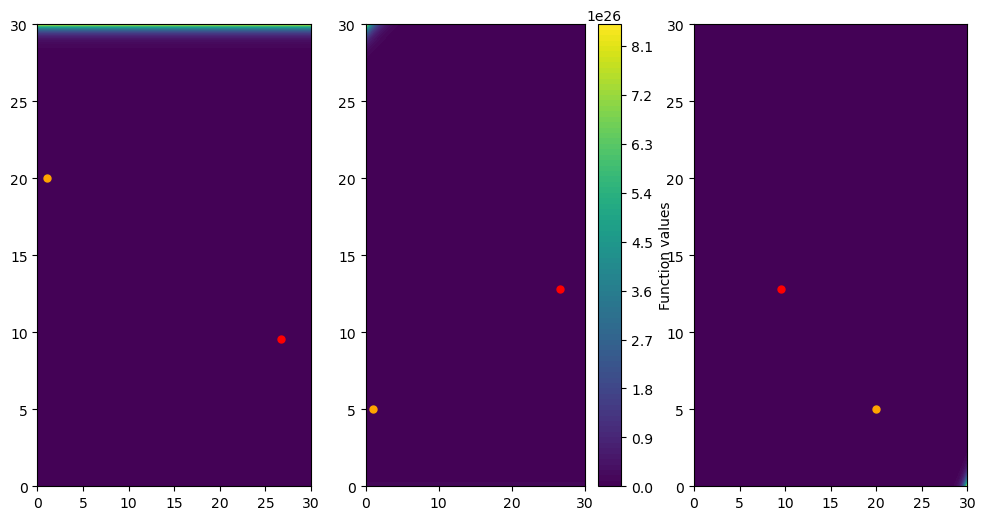

In [12]:
fig, ax = plt.subplots(1,3, figsize=(12,6))
ax = ax.flatten()

x_1 = np.linspace(0, 30, 200)
x_2 = np.linspace(0, 30, 200)
x_3 = np.linspace(0, 30, 200)
grid_size = len(x_1)
X_1_1,  X_2_1 = np.meshgrid(x_1, x_2)
X_2_2, X_3_2 = np.meshgrid(x_2, x_3)
X_1_3, X_3_3 = np.meshgrid(x_1, x_3)

projections = (
    (X_1_1, X_2_1, np.full(grid_size, init_point_b[-1])),
    (X_1_3, np.full(grid_size, init_point_b[-2]), X_3_3),
    (np.full(grid_size, init_point_b[0]), X_2_2, X_3_2)
)

function_1 = f(projections[0])
function_2 = f(projections[1])
function_3 = f(projections[2])

ax[0].contourf(X_1_1, X_2_1, function_1, 100, cmap='viridis')
ax[0].plot(init_point_b[0], init_point_b[1], 'o', markersize=5, color='orange', label='start')
ax[0].plot(minimum_point[0], minimum_point[1], 'o', markersize=5, color='red', label='end')

cp = ax[1].contourf(X_1_3, X_3_3, function_2, 100, cmap='viridis')
ax[1].plot(init_point_b[0], init_point_b[-1], 'o', markersize=5, color='orange', label='start')
ax[1].plot(minimum_point[0], minimum_point[-1], 'o', markersize=5, color='red', label='end')

ax[2].contourf(X_2_2, X_3_2, function_3, 100, cmap='viridis')
ax[2].plot(init_point_b[1], init_point_b[2], 'o', markersize=5, color='orange', label='start')
ax[2].plot(minimum_point[1], minimum_point[-1], 'o', markersize=5, color='red', label='end')

plt.colorbar(cp, label='Function values')
